# multiv Tutorial 1
This tutorial demonstrates the typical uses of slicer and sampling objects from multiv package.<br>
See the images presented in this tutorial to quickly understand what they do.
1. Slice2D, Slice3D for uniform slicing of arrays
2. Sampler2D, Sampler3D for uniform sampling for arrays
3. MultiViewSampler2D, MultiViewSampler3D for a "multi-view" uniform sampling, where a slice is sampled
   together with an envelop of the specified size.

In [1]:
from multivh3 import *
%matplotlib inline

# Slice2D and Slice3D
Partition a 2D array uniformly starting from index 0 in both x and y axes. without padding. Slice3D is the same, except it is 3D.

In [2]:
shape2D = [8,12]
slice_shape = [3,5]

x = np.random.randint(0,10,size=shape2D)
print("An example of 2D array:\n",x)
sl2d = Slice2D(list(x.shape))
sl2d.set_slice_shape(slice_shape)
sl2d.get_uniform_slices_no_padding()
print("\nSlices:\n")
for i, this_slice in enumerate(sl2d.slice_collection):
    print("["+str(i)+"]", this_slice, "\n", x[this_slice], "\n")

shape3D = [8, 8, 9]
slice_shape = [3, 3, 4]

x = np.random.randint(0,10,size=shape3D)
print("An example of 3D array:\n",x)
sl3d = Slice3D(list(x.shape))
sl3d.set_slice_shape(slice_shape)
sl3d.get_uniform_slices_no_padding()
for i, this_slice in enumerate(sl3d.slice_collection):
    print("["+str(i)+"]", this_slice, "\n", x[this_slice], "\n")

An example of 2D array:
 [[5 8 4 8 7 8 0 5 7 7 6 3]
 [6 1 1 9 4 1 1 3 2 9 6 7]
 [3 8 8 3 1 1 5 6 6 5 5 1]
 [4 5 1 9 0 0 8 5 0 9 4 6]
 [2 4 4 9 9 2 7 9 8 0 7 1]
 [9 0 0 0 2 1 1 0 6 3 5 1]
 [1 6 4 5 1 9 5 3 4 1 1 6]
 [3 5 6 4 3 3 6 8 7 3 9 6]]

Slices:

[0] (slice(0, 3, None), slice(0, 5, None)) 
 [[5 8 4 8 7]
 [6 1 1 9 4]
 [3 8 8 3 1]] 

[1] (slice(0, 3, None), slice(5, 10, None)) 
 [[8 0 5 7 7]
 [1 1 3 2 9]
 [1 5 6 6 5]] 

[2] (slice(0, 3, None), slice(10, 12, None)) 
 [[6 3]
 [6 7]
 [5 1]] 

[3] (slice(3, 6, None), slice(0, 5, None)) 
 [[4 5 1 9 0]
 [2 4 4 9 9]
 [9 0 0 0 2]] 

[4] (slice(3, 6, None), slice(5, 10, None)) 
 [[0 8 5 0 9]
 [2 7 9 8 0]
 [1 1 0 6 3]] 

[5] (slice(3, 6, None), slice(10, 12, None)) 
 [[4 6]
 [7 1]
 [5 1]] 

[6] (slice(6, 8, None), slice(0, 5, None)) 
 [[1 6 4 5 1]
 [3 5 6 4 3]] 

[7] (slice(6, 8, None), slice(5, 10, None)) 
 [[9 5 3 4 1]
 [3 6 8 7 3]] 

[8] (slice(6, 8, None), slice(10, 12, None)) 
 [[1 6]
 [9 6]] 

An example of 3D array:
 [[[2 3 5 3 3 6 3 8

# Sampler2D
Suppose we are given a 2D array of size 6 by 8 (row by column) as shown in the figure below. This section demonstrates how to uniform randomly many sample slices of size 2 by 3 centered at the point x, without padding. 

<img src="Image Store/Uniform random 2D/multiv_unirand2D.gif">

In [3]:
def visualize_one_slice(img_arr, sampler2Dobj, slice_center, one_slice):
    xran, yran = range(sampler2Dobj.full_shape[0])[one_slice[0]], range(sampler2Dobj.full_shape[1])[one_slice[1]]
    rect = patches.Rectangle((xran[0], yran[0]),len(xran),len(yran),linewidth=5,edgecolor='r',facecolor='none')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.pcolor(img_arr, cmap='Greys')
    ax.scatter(slice_center[0]+0.5,slice_center[1]+0.5, c='r', marker='x')
    ax.add_patch(rect)
    ax.set_title( str(i) + ":" + str(one_slice))
    plt.colorbar(cax)

[[9 9 2 2 8 3 0 2 1 8 6 6]
 [9 0 3 0 9 9 0 8 3 0 4 0]
 [8 2 9 3 6 5 8 4 4 6 1 7]
 [2 5 7 6 1 4 1 0 7 6 9 5]
 [8 2 7 9 6 4 4 3 6 9 8 7]
 [2 7 3 6 6 3 4 8 9 1 6 9]
 [2 2 5 9 2 6 3 8 8 5 2 3]
 [3 0 1 9 2 5 8 2 3 2 0 2]]


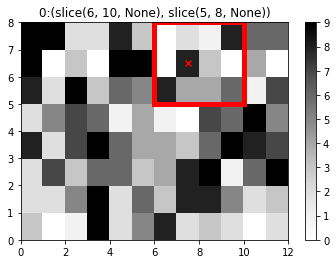

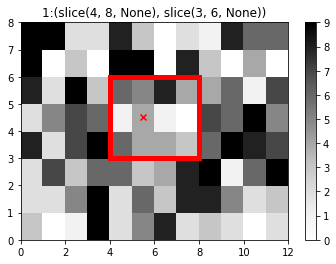

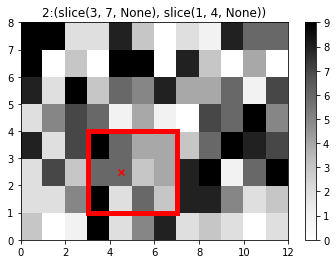

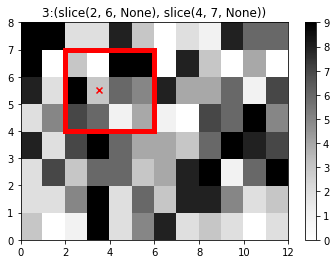

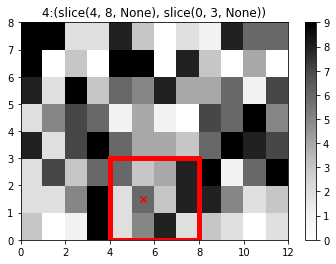

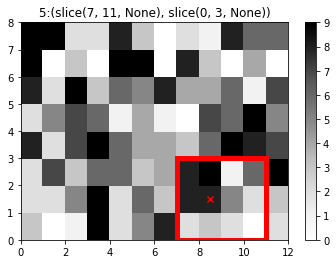

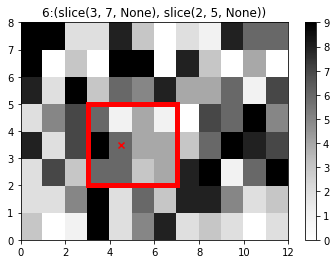

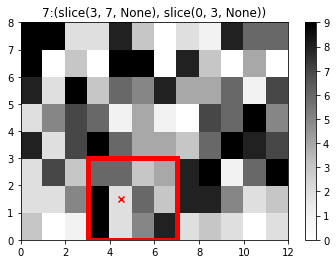

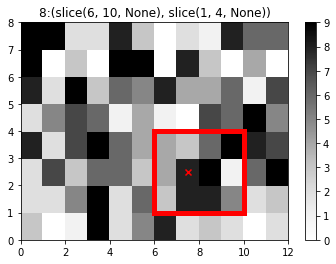

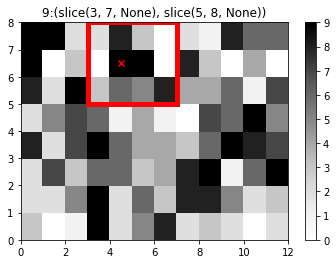

In [4]:
''' Params
shapeND: the full shape of the entire object.
slice_shape: [[x_lower, x_upper],[y_lower, y_upper]]
  From red rectangle shown in the image, x_lower (int) corresponds to the number of cells to the left of the center (x mark),
  x_upper to the right, y_lower below and y_upper above the x mark.
'''
shape2D = [12,8]
slice_shape = [[1,2],[1,1]]
n_sample = 10

x = np.random.randint(0, 10, size=shape2D)
img_arr = x.transpose()
print(np.flipud(img_arr))
""" Setting up """
s2 = Sampler2D(shape2D, slice_shape)
s2.set_center_range(padding=None, verbose=0)

for i in range(n_sample):
    """ Here we sample the slices that we want! """
    slice_center = s2.get_center() # randomly generate a center based on the specification in set_center_range()
    one_slice = s2.get_slice(slice_center) # get the random sample!
    visualize_one_slice(img_arr, s2, slice_center, one_slice)
plt.show()

# MultiViewSampler2D
This is similar to Sampler2D, but with extra "envelop" or "global" slice. The slice is marked in green, while the envelop is marked in red. As before, x mark is the center.
<img src="Image Store\Uniform random 2D multiview/dualview2D_test.gif">

In [5]:
def visualize2D_MultiView(img_arr, i, slice_center, 
    one_slice, delineate, shell_slice, delineate_shell):
    rect, rectS = delineate, delineate_shell
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.pcolor(img_arr, cmap='Greys')
    ax.scatter(slice_center[0]+0.5,slice_center[1]+0.5, c='r', marker='x')
    ax.add_patch(rectS)
    ax.add_patch(rect)
    ax.set_title( str(i) + ":" + str(one_slice))
    plt.colorbar(cax) 

A 2D array:
 [[7 3 4 2 2 5 6 3 6 4 2 5]
 [6 8 1 3 4 0 0 1 3 1 9 1]
 [5 8 5 4 8 3 1 6 6 7 9 3]
 [4 3 3 8 9 2 9 7 6 7 2 5]
 [9 3 1 3 7 7 9 4 1 9 9 6]
 [8 7 4 0 6 8 1 5 0 2 1 0]
 [2 9 2 1 6 4 8 0 9 5 2 5]
 [1 8 7 2 6 7 4 7 5 7 7 7]]


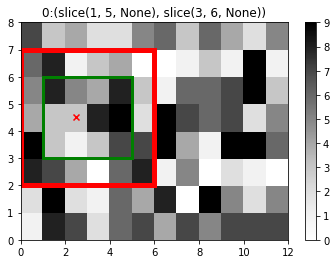

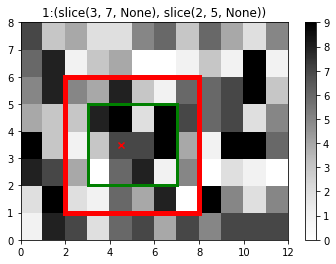

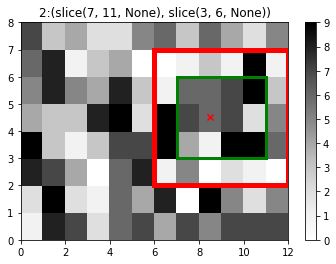

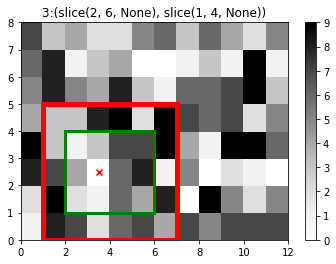

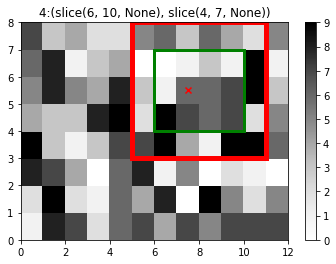

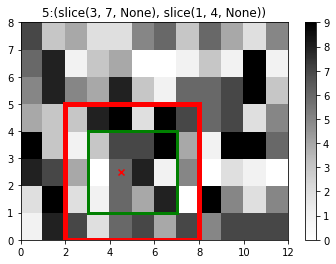

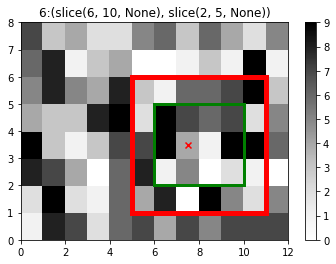

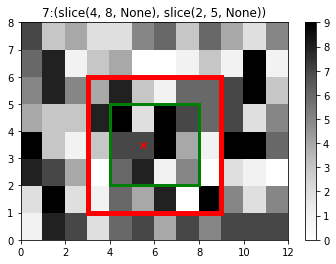

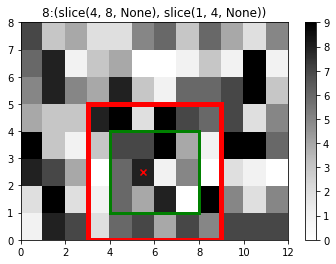

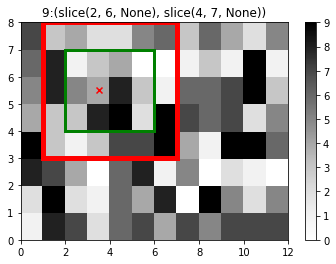

In [6]:
''' Params
shapeND: the full shape of the entire object.
slice_shape: [[x_lower, x_upper],[y_lower, y_upper]]
  From red rectangle shown in the image, x_lower (int) corresponds to the number of cells to the left of the center (x mark),
  x_upper to the right, y_lower below and y_upper above the x mark.
shell_shape: [[x_lower, x_upper],[y_lower, y_upper]]
'''
shape2D = [12,8]
slice_shape = [[1,2],[1,1]]
shell_shape = [[2,3],[2,2]]
n_sample = 10

x = np.random.randint(0, 10, size=shape2D)
img_arr = x.transpose()
print("A 2D array:\n",np.flipud(img_arr))

ms2 = MultiViewSampler2D(shape2D, slice_shape, shell_shape)
ms2.set_center_range(padding=None, verbose=0)


for i in range(n_sample):
    slice_center = ms2.get_center()
    one_slice = ms2.get_slice(slice_center)
    one_shell_slice = ms2.get_shell_slice(slice_center)

    """ Get the rectangles marking the slices"""
    xran, yran = range(ms2.full_shape[0])[one_slice[0]], range(ms2.full_shape[1])[one_slice[1]]
    xSran, ySran = range(ms2.full_shape[0])[one_shell_slice[0]], range(ms2.full_shape[1])[one_shell_slice[1]]
    rect = patches.Rectangle((xran[0], yran[0]),len(xran),len(yran),linewidth=3,edgecolor='g',facecolor='none')
    rectS = patches.Rectangle((xSran[0], ySran[0]),len(xSran),len(ySran),linewidth=5,edgecolor='r',facecolor='none')
    
    delineate, delineate_shell = rect, rectS  
    visualize2D_MultiView(img_arr, i, slice_center, one_slice, delineate, one_shell_slice, delineate_shell)


# Sampler3D
This is very similar to Sampler2D, except that it is in 3D.

In [7]:
def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax

def visualize_one_slice2(img_arr, slice_center, one_slice):
    alpha=0.2
    s = img_arr.shape
    filled, filled2, filled3 = np.ones(s), np.zeros(s), np.zeros(s)
    filled2[one_slice], filled3[slice_center] = 1, 1
    xran, yran, zran = range(s[0])[one_slice[0]], range(s[1])[one_slice[1]], range(s[2])[one_slice[2]]
    xmin, xmax, ymin, ymax, zmin, zmax = np.min(xran), np.max(xran), np.min(yran), np.max(yran), np.min(zran), np.max(zran)
    colors = np.zeros(s + (4,))
    colors[:,:,:,2], colors[:,:,:,3] = img_arr/np.max(img_arr), alpha
    colors2, colors3 = '#ff000050', '#ff000090'  

    filled2[one_slice] = np.max(filled) + 2
    ax = make_ax(grid=True)
    ax.voxels(filled3, facecolors=colors3, edgecolors='black')
    ax.voxels(filled2, facecolors=colors2, edgecolors='grey')
    ax.voxels(filled, facecolors=colors, edgecolors=None)
    this_string = "(" + str(xmin) + "," + str(ymin) + ","  + str(zmin) + ")"
    this_string2 = "(" + str(xmax) + "," + str(ymax) + ","  + str(zmax) + ")"
    this_title = str(i) + ":" + str(one_slice)
    ax.text(xmin-0.5, ymin-0.5, zmin-0.5, s=this_string, color='y', fontsize=12)
    ax.text(xmax+0.5, ymax+0.5, zmax+1.5, s=this_string2, color='y', fontsize=12)
    ax.set_title(this_title)

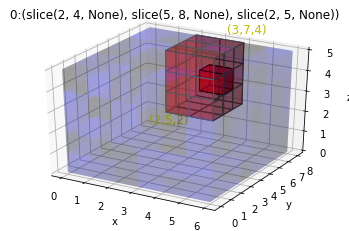

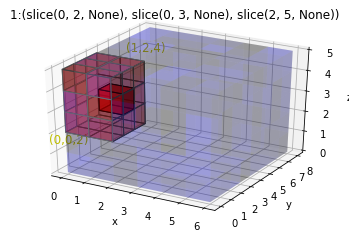

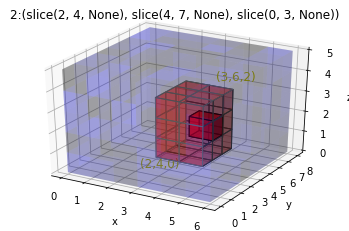

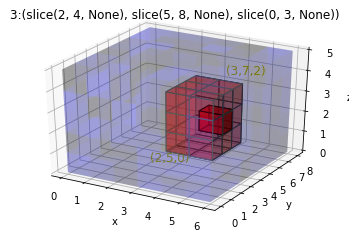

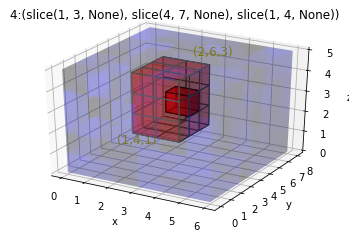

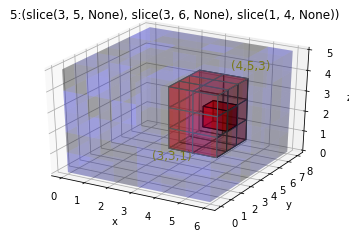

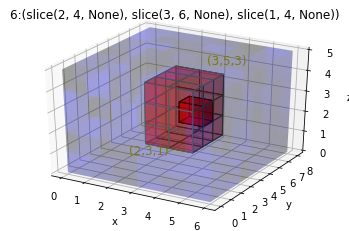

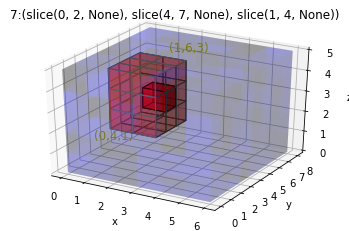

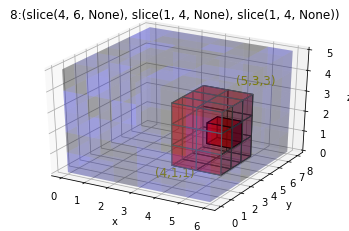

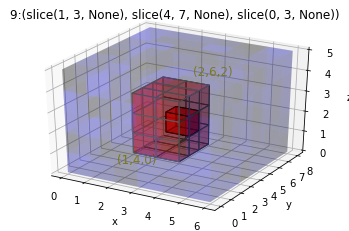

In [8]:
shapeND = [6,8,5]
slice_shape = [[1,0],[1,1],[1,1]]
n_sample = 10

from mpl_toolkits.mplot3d import Axes3D

x = np.random.randint(0, 10, size=shapeND)
s3 = Sampler3D(shapeND, slice_shape)
s3.set_center_range(padding=None, verbose=0)
for i in range(n_sample):
    slice_center = s3.get_center()
    one_slice = s3.get_slice(slice_center)
    visualize_one_slice2(x, slice_center, one_slice)
    
plt.show()

# MultiViewSampler3D
This is similar to MultiViewSampler2D, except it is in 3D.
<img src="Image Store\Uniform random 3D multiview/dualview3D_test.gif">

In [9]:
def visualize3D_MultiView(img_arr, i, slice_center, one_slice, shell_slice):
    alpha=0.2
    s = img_arr.shape
    filled, filled2, filled3, filled4 = np.ones(s), np.zeros(s), np.zeros(s), np.zeros(s)
    filled2[one_slice], filled3[slice_center], filled4[shell_slice] = 1, 1, 1
    xran, yran, zran = range(s[0])[shell_slice[0]], range(s[1])[shell_slice[1]], range(s[2])[shell_slice[2]]
    xmin, xmax, ymin, ymax, zmin, zmax = np.min(xran), np.max(xran), np.min(yran), np.max(yran), np.min(zran), np.max(zran)

    colors = np.zeros(s + (4,))
    colors[:,:,:,2], colors[:,:,:,3] = img_arr/np.max(img_arr), alpha
    colors2, colors3, colors4 = '#ff000050', '#ff000090' ,'#00550010' 

    filled2[one_slice] = np.max(filled) + 2
    ax = make_ax(grid=True)
    ax.voxels(filled4, facecolors=colors4, edgecolors='grey')
    ax.voxels(filled3, facecolors=colors3, edgecolors='black')
    ax.voxels(filled2, facecolors=colors2, edgecolors='grey')
    ax.voxels(filled, facecolors=colors, edgecolors=None)
    this_string = "(" + str(xmin) + "," + str(ymin) + ","  + str(zmin) + ")"
    this_string2 = "(" + str(xmax) + "," + str(ymax) + ","  + str(zmax) + ")"
    this_title = str(i) + ":" + str(one_slice)
    ax.text(xmin-0.5, ymin-0.5, zmin-0.5, s=this_string, color='y', fontsize=12)
    ax.text(xmax+0.5, ymax+0.5, zmax+1.5, s=this_string2, color='y', fontsize=12)
    ax.set_title(this_title)

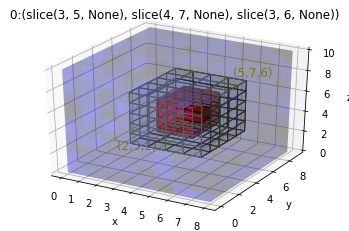

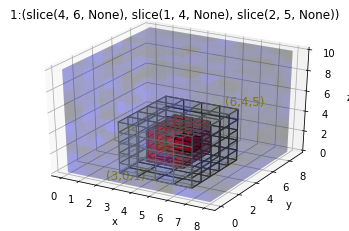

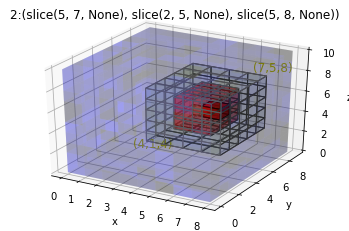

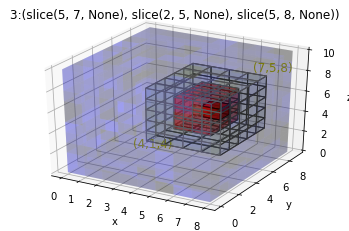

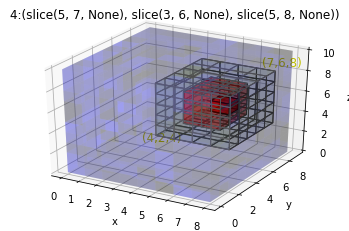

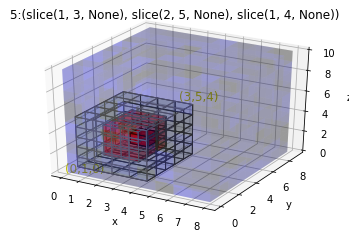

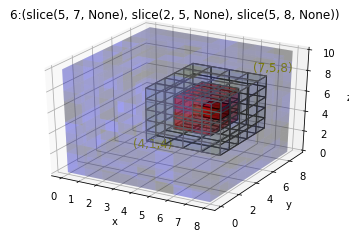

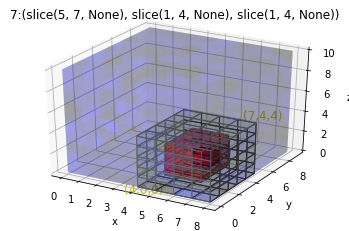

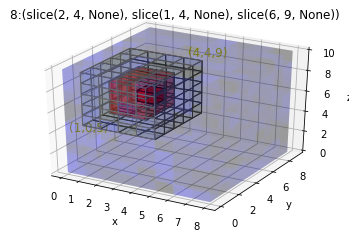

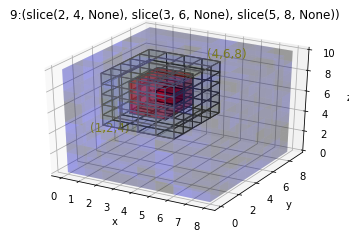

In [10]:
shapeND = [8,9,10]
slice_shape = [[1,0],[1,1],[1,1]]
shell_shape = [[2,1],[2,2],[2,2]]
n_sample = 10
x = np.random.randint(0, 10, size=shapeND)
img_arr = x

ms3 = MultiViewSampler3D(shapeND, slice_shape, shell_shape)
ms3.set_center_range(padding=None, verbose=0)
for i in range(n_sample):
    slice_center = ms3.get_center()
    one_slice = ms3.get_slice(slice_center)
    one_shell_slice = ms3.get_shell_slice(slice_center)
    visualize3D_MultiView(img_arr, i, slice_center, one_slice, one_shell_slice)